# Import libraries and read csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import skew,norm

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [5]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Data Exploratory Analysis

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


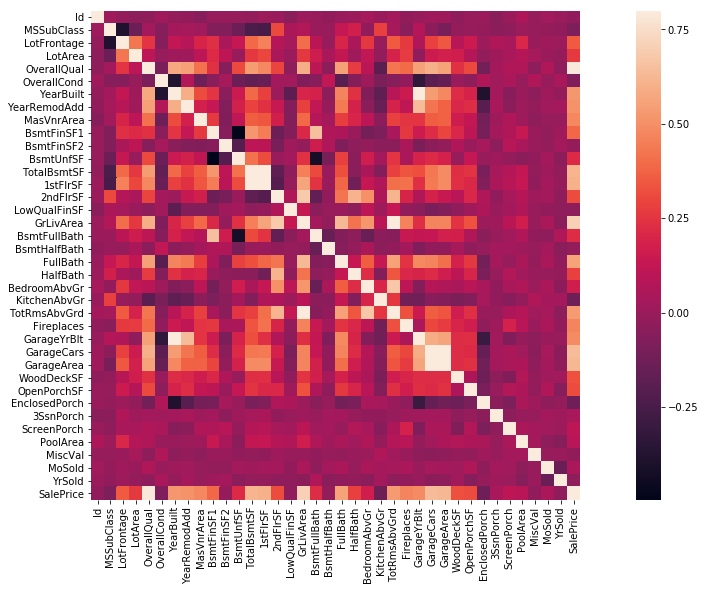

In [8]:
#Correlation analysis (pair-wise and attribute combinations)
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

# Data cleaning (outliers, missing data, data errors)

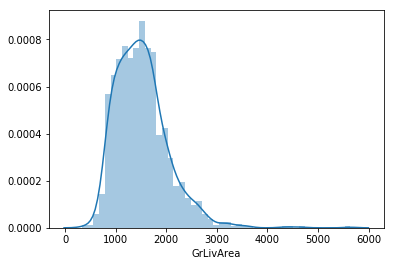

In [9]:
sns.distplot(train.GrLivArea)

(0, 900000)

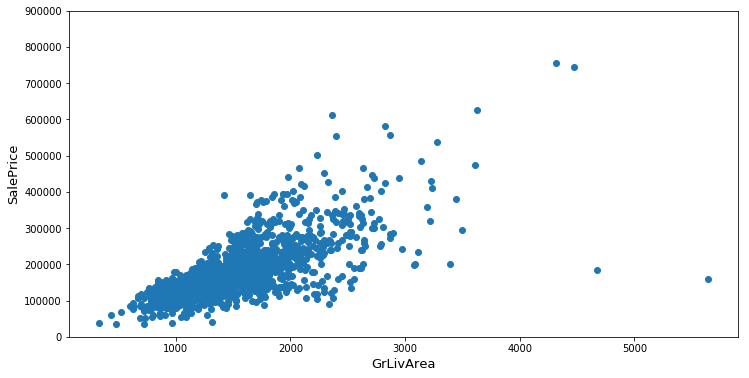

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,900000)

In [11]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

(0, 900000)

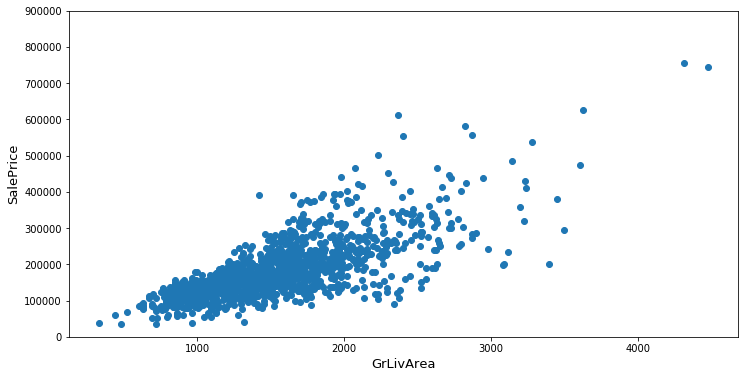

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,900000)

Text(0, 0.5, 'SalePrice')

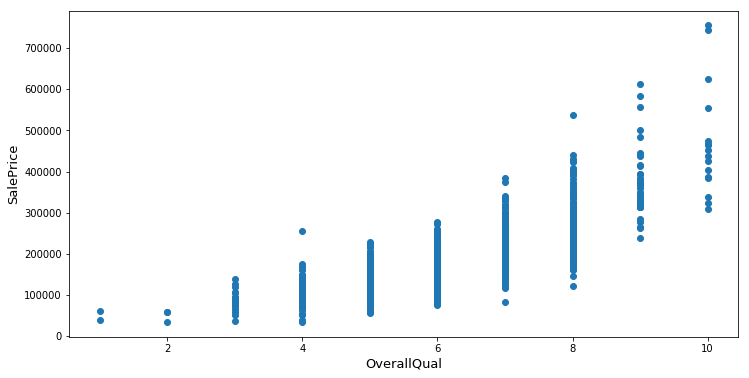

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.OverallQual, y=train.SalePrice)
plt.xlabel("OverallQual", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

In [14]:
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

Text(0, 0.5, 'SalePrice')

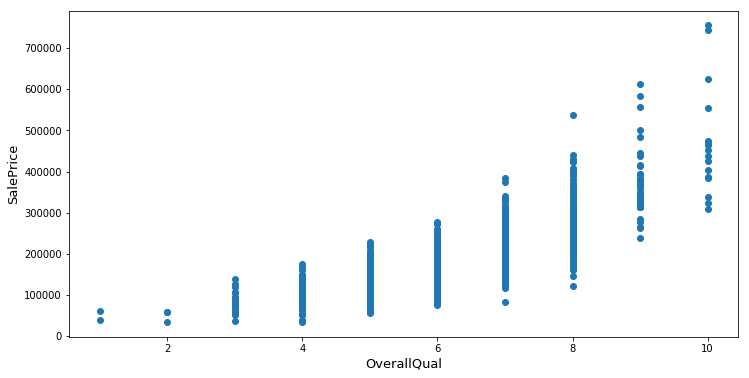

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.OverallQual, y=train.SalePrice)
plt.xlabel("OverallQual", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

### In order to better analyzing data, I will combine train and test dataset. Since there may miss a lot of data and may miss different variable value between train and test dataset.

In [16]:
y_train = train.SalePrice.values
test_ID = test['Id']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2916, 80)


### Transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7C455BAC8>,
      dtype=object)

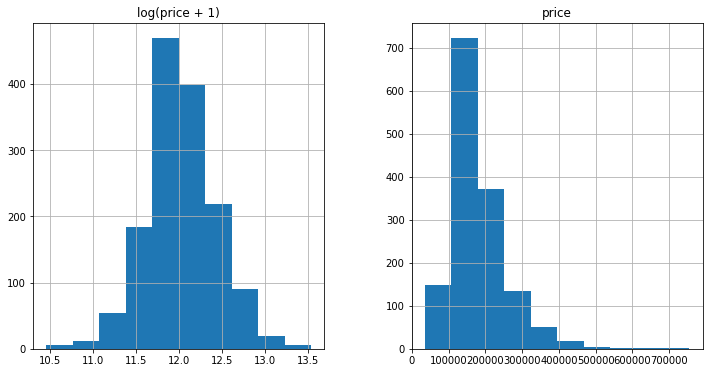

In [17]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [18]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


### Some of the non-numeric predictors are stored as numbers; we convert them into strings:

In [19]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Look at missing data:

In [20]:
total = all_data.isnull().sum()
total = total[total>0]
percent = (all_data.isnull().sum()/all_data.isnull().count())
percent = percent[percent>0]
dtypes = all_data.dtypes
nulls = np.sum(all_data.isnull())
dtypes2 = dtypes.loc[(nulls != 0)]
missing_data = pd.concat([total,percent,dtypes2], axis = 1).sort_values(by=0,ascending=False)
missing_data

,0,1,2
PoolQC,2907,0.996914,object
MiscFeature,2811,0.963992,object
Alley,2718,0.932099,object
Fence,2345,0.804184,object
FireplaceQu,1420,0.486968,object
LotFrontage,485,0.166324,float64
GarageCond,159,0.054527,object
GarageQual,159,0.054527,object
GarageYrBlt,159,0.054527,float64
GarageFinish,159,0.054527,object


### Drop out variables where more than 40% missing values

In [21]:
all_data.drop(['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu'], axis=1, inplace=True)

### Convert categorical variable into dummy variables:

In [22]:
all_data = pd.get_dummies(all_data)

### Filling NAN's with the mean of the column:

In [23]:
all_data = all_data.fillna(all_data.mean())

### Divide the data back:

In [36]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [37]:
print(X_train.shape)
print(X_test.shape)
print (y.shape)

(1457, 300)
(1459, 300)
(1457,)


# Machine Learning Modeling

#### For this analysis I am trying 13 different algorithms:
- LinearRegression()
- Ridge()
- Lasso(alpha=0.01,max_iter=10000)
- DecisionTreeRegressor(random_state=1)
- RandomForestRegressor()
- GradientBoostingRegressor()
- SVR()
- LinearSVR()
- ElasticNet(alpha=0.001,max_iter=10000)
- BayesianRidge()
- KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
- ExtraTreesRegressor()
- XGBRegressor()

The method of measuring accuracy was chosen to be Root Mean Squared Error, as described within the competition.

### Validation functions:

In [40]:
def rmse_cv(model,X,y):
    kf = KFold(n_splits = 5, shuffle=True, random_state=40)#.get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

### Testing models:

In [41]:
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          DecisionTreeRegressor(random_state=1),
          RandomForestRegressor(n_estimators=10),
          GradientBoostingRegressor(),
          SVR(),
          LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          BayesianRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(n_estimators=10),
          XGBRegressor()]

In [42]:
names = ["LR", "Ridge", "Lasso", "DT","RF", "GBR", "SVR", "LinSVR", "Ela", "Bay", "Ker", "Extra", "Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train, y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.122635, 0.0071
Ridge: 0.116225, 0.0047
Lasso: 0.139235, 0.0096
DT: 0.210232, 0.0090
RF: 0.148124, 0.0088
GBR: 0.124285, 0.0039
SVR: 0.398800, 0.0141
LinSVR: 0.246246, 0.0905
Ela: 0.111926, 0.0047
Bay: 0.114070, 0.0040
Ker: 0.205135, 0.0237
Extra: 0.149663, 0.0068
Xgb: 0.124511, 0.0057


### Here we see that the best results have ElasticNet and BayesianRidge models , so, let's use them to predict the answers:

In [46]:
model_Ela = ElasticNet(alpha=0.001,max_iter=10000)
model_Ela.fit(X_train, y)
Ela_pred = np.expm1(model_Ela.predict(X_test))

model_Bay = BayesianRidge()
model_Bay.fit(X_train, y)
Bay_pred = np.expm1(model_Bay.predict(X_test))

In [50]:
prediction = 0.1*Bay_pred + 0.9*Ela_pred

In [52]:
my_submission = pd.DataFrame({'Id': test_ID, 'SalePrice': prediction})
my_submission.to_csv('submission.csv', index=False)

## This model helped me to reach top 20% on the leaderboard with the final score 0.11909.
